In [1]:
!pip install aguaclara

     |████████████████████████████████| 92kB 2.7MB/s 
     |████████████████████████████████| 163kB 7.8MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.0-cp36-none-any.whl size=99623 sha256=3d9efed741aad20c45a91be6cf3e96ae434f06913b884199d9b41cc813e3560c
  Stored in directory: /root/.cache/pip/wheels/34/e9/34/0d3722243083a982623290c205c14a08b54ed290ee29219fd2
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=b0971823ac643ad2788168b32735469c667528ca514e2982d40022c563a628f2
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint


In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [0]:
Concordia_path = "https://github.com/monroews/playing/raw/master/Nicaragua_Plant_Performance/Registro%20de%20la%20planta%20Potabilizadora%20La%20Concordia.xlsx"
SanRafael_path = "https://github.com/monroews/playing/raw/master/Nicaragua_Plant_Performance/Registro%20de%20la%20planta%20Potabilizadora21_08_19%20San%20Rafael%20del%20Norte.xlsx"
Concordia_data = pd.read_excel(Concordia_path,sheet_name="Libro II")
SanRafael_data = pd.read_excel(SanRafael_path,sheet_name="LIBRO V")

In [5]:
Concordia_data.head(3)

,Fecha,Hora,Operador,Caudal (L/s),UTM Entrada,UTM Sed,UTM Filtro,1 - Purga,Retrolavado,Cuagulante,Unnamed: 10,Cloro,Unnamed: 12,Eficiencia General,Eficiencia del sedimentador,Eficiencia Filtro
0,NaT,NaN,NaN,nan,nan,nan,nan,NaN,NaN,mg/L,ML/m,mg/L,ML/m,nan,nan,nan
1,2018-08-31,08:00:00,Franco Zeledón,5,3.26,0.01,0.01,NaN,NaN,5.86,16,1.57,78,0.9969,0.9969,0
2,2018-08-31,09:00:00,Franco Zeledón,5,2.89,0.01,0.01,NaN,NaN,5.86,16,1.61,80,0.9965,0.9965,0


In [110]:
Cd_raw = np.sort(Concordia_data['UTM Entrada']) * u.NTU
Cd_sed = np.sort(Concordia_data['UTM Sed']) * u.NTU
Cd_filter = np.sort(Concordia_data['UTM Filtro ']) * u.NTU
Cd_count = Cd_raw.shape[0]
print(Cd_count)
Cd_rank = np.linspace(0,1,Cd_count,endpoint=True)

SR_raw = np.sort(SanRafael_data[' Entrada']) * u.NTU
SR_sed = np.sort(SanRafael_data['SEDI']) * u.NTU
SR_filter = np.sort(SanRafael_data[' Filtro # 1']) * u.NTU
SR_count = SR_raw.shape[0]
print(SR_count)
SR_rank = np.linspace(0,1,SR_count,endpoint=True)


2862
1972


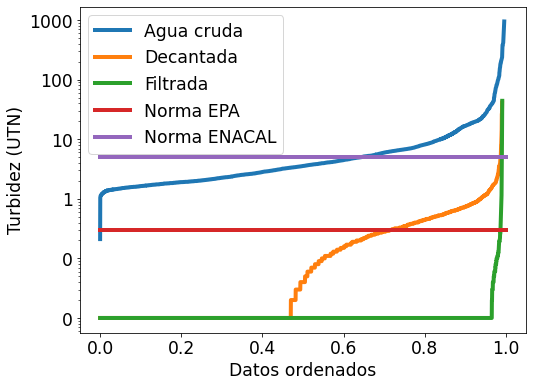

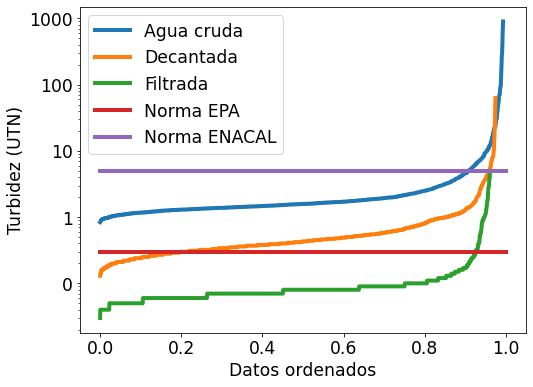

In [159]:
font = 'xx-large'
params = {'legend.fontsize': font,
         'figure.figsize': (8,6),
         'axes.labelsize': font,
         'axes.titlesize':font,
         'xtick.labelsize':font,
         'ytick.labelsize':font,
         'axes.formatter.useoffset':False}
plt.rcParams.update(params)


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

f = ticker.ScalarFormatter()
f.set_scientific(False)

fig, ax = plt.subplots()

ax.plot(Cd_rank,Cd_raw,linewidth=4)
ax.plot(Cd_rank,Cd_sed,linewidth=4)
ax.plot(Cd_rank,Cd_filter,linewidth=4)
ax.plot([0,1],[0.3,0.3],linewidth=4)
ax.plot([0,1],[5,5],linewidth=4)
ax.set_ylabel('Turbidez (UTN)')
ax.set_xlabel('Datos ordenados')
ax.set_yscale('log')
ax.legend(['Agua cruda','Decantada','Filtrada','Norma EPA','Norma ENACAL'])
ax.yaxis.set_major_formatter(f)
plt.show()

fig, ax = plt.subplots()

ax.plot(SR_rank,SR_raw,linewidth=4)
ax.plot(SR_rank,SR_sed,linewidth=4)
ax.plot(SR_rank,SR_filter,linewidth=4)
ax.plot([0,1],[0.3,0.3],linewidth=4)
ax.plot([0,1],[5,5],linewidth=4)
ax.set_ylabel('Turbidez (UTN)')
ax.set_xlabel('Datos ordenados')
ax.set_yscale('log')
ax.legend(['Agua cruda','Decantada','Filtrada','Norma EPA','Norma ENACAL'])
ax.yaxis.set_major_formatter(f)
plt.show()